In [77]:
import statsmodels.api as sm
import numpy as np
from econml.dml import LinearDML
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from catboost import CatBoostRegressor, CatBoostClassifier
from scipy.stats import logistic

MC_N = 50
MC_θ = np.zeros((MC_N,4))
MC_y = np.zeros((MC_N,4))
MC_t = np.zeros((MC_N,4))

for j in range(MC_N):
    import numpy as np
    N = 5000
    σ_t = 1
    σ_y = 1
    σ_x = 1
    θ = 0.5 # TRUE ATE
    α_t = 0.5
    α_y = 0.5
    x = np.random.normal(0,σ_x,N)
    e_t = np.random.normal(0,σ_t,N)
    e_y = np.random.normal(0,σ_y,N)
    t = np.random.binomial(1,logistic.cdf(α_t*x))
    y = α_y * x + θ * t + e_y
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    t = t.reshape(-1, 1)
    data = np.c_[y,t,x]
    print(data[0:5])
    
    # OLS - Full Estimation
    model_OLS = sm.OLS(y, np.c_[t,x])
    res = model_OLS.fit()
    θ_OLS = res.params[0]
    # OLS First Stage: Y
    model_OLS = sm.OLS(y, np.c_[x])
    res_y = model_OLS.fit()
    θ_OLS_y = res_y.params[0]    
    # Logistic First Stage
    clf = LogisticRegression(random_state=0).fit(x, t)
    
    # DML Lasso
    model_Lasso = LinearDML(discrete_treatment=True, random_state=1)
    model_Lasso.fit(y, t, X=None,W=x)
    θ_DMLL = model_Lasso.intercept_

    # DML RF
    model_XGB = LinearDML(discrete_treatment=True, 
                          model_y = CatBoostRegressor(learning_rate=0.01, verbose = False), 
                          model_t = CatBoostClassifier(learning_rate=0.01, verbose = False))
    model_XGB.fit(y.ravel(), t.ravel(), X=None,W=x)
    θ_DMLRF = model_XGB.intercept_
    
    # DML NN - First Stage
    model_NN = LinearDML(discrete_treatment=True, 
                         model_y = MLPRegressor(hidden_layer_sizes=()), 
                         model_t = MLPClassifier(hidden_layer_sizes=()))
    model_NN.fit(y.ravel(), t.ravel(), X=None,W=x)
    θ_DMLRF = model_NN.intercept_


    MC_θ[j] = [θ_OLS, model_Lasso.intercept_, model_XGB.intercept_, model_NN.intercept_]
    MC_y[j] = [res_y.rsquared, np.mean(model_Lasso.nuisance_scores_y), np.mean(model_XGB.nuisance_scores_y),np.mean(model_NN.nuisance_scores_y)]
    MC_t[j] = [clf.score(x,t), np.mean(model_Lasso.nuisance_scores_t), np.mean(model_XGB.nuisance_scores_t),np.mean(model_NN.nuisance_scores_t)]
    
    

[[ 0.226  0.    -0.783]
 [ 0.384  0.     0.435]
 [ 1.156  1.     0.978]
 [ 0.982  0.    -0.062]
 [-0.713  0.    -0.469]]


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.966  1.     0.611]
 [ 1.062  1.     0.131]
 [-1.223  0.    -0.786]
 [ 0.533  1.     1.202]
 [-1.174  0.     1.119]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.175  0.    -0.025]
 [ 0.904  1.     0.286]
 [ 1.425  1.     0.51 ]
 [ 1.235  0.     1.133]
 [-0.324  0.    -0.564]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-1.629  0.    -0.653]
 [ 1.652  0.    -0.516]
 [ 0.185  1.    -0.045]
 [ 1.184  0.     1.523]
 [ 2.623  1.     1.332]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.264  0.     0.347]
 [ 0.496  0.    -0.204]
 [ 0.472  1.    -0.21 ]
 [-0.169  0.     0.217]
 [-0.044  0.     0.003]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.349  0.     1.243]
 [ 1.609  0.     1.751]
 [ 1.23   1.     0.763]
 [ 1.329  0.    -1.053]
 [ 1.362  1.    -0.628]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.37   1.    -1.012]
 [-0.17   0.     0.725]
 [ 1.864  0.    -0.395]
 [-1.251  0.    -0.471]
 [ 2.34   1.    -0.259]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-1.77   0.    -2.068]
 [ 1.092  1.     0.694]
 [-0.615  0.    -0.073]
 [ 1.025  1.     0.014]
 [-2.318  0.    -0.175]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.686  0.     0.338]
 [ 0.731  0.     0.306]
 [ 0.457  0.    -0.901]
 [ 1.413  0.     0.472]
 [-0.352  0.    -1.592]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.123  0.     0.602]
 [ 0.896  0.    -0.716]
 [-0.203  1.    -1.107]
 [ 0.208  0.    -1.463]
 [ 0.764  1.     0.437]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.093  1.    -0.122]
 [ 0.068  0.     0.329]
 [ 0.094  1.    -2.025]
 [-0.609  0.     0.04 ]
 [-0.711  0.    -1.264]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.596  1.     0.645]
 [ 0.386  1.    -0.95 ]
 [-0.626  1.    -0.256]
 [-0.64   0.    -1.253]
 [ 2.014  1.    -0.335]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.141  0.     0.499]
 [ 0.455  0.     1.981]
 [ 0.116  1.     0.28 ]
 [-0.098  0.    -0.234]
 [-1.68   0.    -1.678]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.188  1.     1.094]
 [ 1.345  0.    -0.269]
 [-0.063  0.     1.701]
 [-1.034  0.     0.464]
 [-1.426  0.     0.269]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.714  0.    -0.656]
 [ 0.957  1.    -0.182]
 [ 1.012  0.    -0.408]
 [-0.835  0.    -1.129]
 [-1.058  0.    -1.066]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.822  0.    -0.294]
 [-0.013  0.    -1.612]
 [ 0.131  1.     0.106]
 [ 0.588  0.    -0.44 ]
 [-0.159  0.    -0.49 ]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.47   0.     0.512]
 [-0.983  1.    -0.657]
 [-0.39   1.     0.046]
 [ 0.277  1.     1.21 ]
 [-0.779  0.     0.027]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.26   1.     1.84 ]
 [-0.361  0.    -1.009]
 [-2.375  0.    -1.691]
 [ 0.391  1.    -1.697]
 [ 0.446  1.    -0.267]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.87   1.    -0.957]
 [-0.34   0.    -2.425]
 [-0.534  0.    -0.275]
 [-1.014  0.    -1.939]
 [ 1.576  0.    -2.003]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.718  1.    -0.549]
 [ 1.405  1.    -0.913]
 [ 0.322  0.    -1.348]
 [-0.004  1.     0.66 ]
 [-1.367  0.     0.301]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.214  1.     0.576]
 [ 1.227  0.     0.152]
 [-0.245  0.     1.784]
 [-0.804  1.    -0.43 ]
 [-0.582  1.    -0.302]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.547  1.    -0.961]
 [ 1.667  1.    -1.178]
 [-1.252  0.    -1.349]
 [-2.443  0.    -1.295]
 [-1.516  1.    -0.598]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.259  1.    -0.612]
 [ 0.871  0.    -0.249]
 [-0.432  1.    -1.302]
 [-1.552  1.    -0.755]
 [-1.145  1.    -0.061]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.047  1.    -0.232]
 [ 0.945  1.     1.041]
 [-1.75   1.    -0.122]
 [ 1.704  1.    -0.101]
 [-2.318  0.    -1.599]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.224  1.     0.534]
 [ 0.546  0.     0.337]
 [-2.041  0.    -1.016]
 [-1.444  0.    -2.106]
 [-0.619  1.    -0.535]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.538  0.    -0.195]
 [ 1.455  1.     0.511]
 [-1.409  0.     0.042]
 [ 1.189  0.     2.522]
 [-0.927  0.    -0.579]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.409  1.    -0.707]
 [ 0.37   0.    -2.057]
 [-1.18   0.    -2.615]
 [ 0.595  0.    -0.509]
 [-0.224  0.     0.075]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.088  0.     1.2  ]
 [-1.215  0.    -1.651]
 [ 0.243  1.    -0.38 ]
 [ 1.965  1.     0.21 ]
 [-1.688  0.    -1.302]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.636  1.    -0.01 ]
 [-1.078  1.     0.203]
 [ 1.177  1.     0.451]
 [ 2.125  1.     1.05 ]
 [ 1.847  1.    -0.028]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.099  1.     1.411]
 [-1.462  0.    -1.018]
 [-1.683  1.    -2.207]
 [ 2.539  1.     1.662]
 [-0.031  1.    -0.049]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.469  1.     1.454]
 [ 1.717  1.     0.472]
 [ 1.125  1.     0.351]
 [ 1.007  1.    -0.646]
 [-0.354  0.     0.823]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.746  1.     0.65 ]
 [ 1.636  0.     0.895]
 [-1.591  0.     0.854]
 [ 0.57   1.     1.317]
 [ 0.649  0.    -0.213]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.907  0.     0.384]
 [-1.957  0.    -0.757]
 [ 2.432  1.     0.985]
 [ 0.541  1.    -0.456]
 [-0.663  0.     0.794]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.151  1.     1.761]
 [-0.272  0.     1.111]
 [ 1.62   1.     1.771]
 [ 0.281  0.    -0.479]
 [ 0.637  1.    -0.297]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.891  0.     0.602]
 [ 0.855  1.     0.673]
 [ 2.283  1.    -0.061]
 [-1.565  0.    -0.887]
 [ 0.233  1.    -1.775]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.287  1.     1.048]
 [ 0.649  0.    -0.683]
 [-0.76   0.    -1.23 ]
 [ 1.082  1.     0.684]
 [ 1.47   1.     1.123]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.507  0.     0.491]
 [-0.331  1.    -0.142]
 [ 1.983  1.     1.287]
 [-0.04   0.     0.532]
 [ 1.372  1.     1.166]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.879  1.     0.669]
 [ 1.448  1.     1.732]
 [-2.262  1.    -1.211]
 [ 0.312  1.     0.129]
 [-0.832  0.    -0.674]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.822  1.     1.358]
 [ 0.631  1.    -0.556]
 [-0.098  0.     0.899]
 [ 1.978  1.     0.715]
 [-1.768  0.    -1.516]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[2.916 1.    0.9  ]
 [1.386 1.    0.709]
 [1.138 1.    2.699]
 [0.884 0.    0.038]
 [2.573 1.    1.65 ]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.415  1.    -0.511]
 [-0.239  0.    -2.233]
 [-0.511  1.    -0.192]
 [ 1.218  1.     0.649]
 [ 0.418  0.     1.092]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.205  0.    -0.222]
 [ 2.605  1.     0.377]
 [ 1.649  0.     1.139]
 [ 0.48   1.    -0.522]
 [ 0.034  0.     0.635]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.532  1.     2.005]
 [-0.327  1.     0.376]
 [-0.174  0.     1.368]
 [-0.755  0.    -0.084]
 [ 0.221  1.     0.181]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.865e+00  1.000e+00  4.687e-01]
 [ 2.508e+00  1.000e+00 -5.033e-01]
 [ 1.474e+00  1.000e+00  1.049e+00]
 [ 2.571e+00  1.000e+00  5.172e-01]
 [-4.884e-04  1.000e+00 -9.159e-01]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.888  1.     0.184]
 [-0.174  1.     0.229]
 [-1.409  0.    -2.511]
 [ 0.864  1.    -1.211]
 [ 1.15   0.     0.805]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.882  0.    -1.51 ]
 [ 0.336  1.     0.343]
 [-1.566  1.    -0.238]
 [-0.893  0.    -1.318]
 [ 1.123  0.     0.205]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.828  1.    -0.643]
 [-1.526  1.    -1.451]
 [ 0.437  0.    -0.348]
 [ 0.443  0.     2.043]
 [ 0.531  1.     0.294]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.59   0.    -0.528]
 [ 2.102  1.     0.223]
 [-0.173  0.    -0.868]
 [ 0.61   1.     0.253]
 [-0.222  0.    -0.726]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.43   0.     0.533]
 [ 0.177  1.    -1.169]
 [ 2.218  1.     0.232]
 [ 2.482  0.     0.607]
 [-0.448  0.    -0.634]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.997  1.    -0.402]
 [-0.337  0.     0.139]
 [ 1.931  0.     1.391]
 [ 0.194  1.    -1.376]
 [ 1.563  1.    -1.104]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.


In [78]:
from prettytable import PrettyTable
from PIL import Image, ImageDraw, ImageFont
table = PrettyTable()
table.field_names = ['Var', 'OLS','DML-L','DML-Boost','DML-NN']
a = ['Mean θ_hat']+ np.mean(MC_θ, axis = 0).tolist()
table.add_row(a)
a = ['Stdev θ_hat']+ np.std(MC_θ, axis = 0).tolist()
table.add_row(a)
a = ['97.5 Quantile θ_hat']+ np.quantile(MC_θ,0.975, axis = 0).tolist()
table.add_row(a)
a = ['2.5 Quantile θ_hat']+ np.quantile(MC_θ,0.025, axis = 0).tolist()
table.add_row(a)
a = ['First Stage Y R2']+ np.mean(MC_y, axis = 0).tolist()
table.add_row(a)
a = ['First Stage D Accuracy']+ np.mean(MC_t, axis = 0).tolist()
table.add_row(a)
table.float_format = '0.3'
print(table)

+------------------------+-------+-------+-----------+--------+
|          Var           |  OLS  | DML-L | DML-Boost | DML-NN |
+------------------------+-------+-------+-----------+--------+
|       Mean θ_hat       | 0.500 | 0.499 |   0.505   | 0.505  |
|      Stdev θ_hat       | 0.020 | 0.028 |   0.027   | 0.027  |
|  97.5 Quantile θ_hat   | 0.538 | 0.550 |   0.552   | 0.551  |
|   2.5 Quantile θ_hat   | 0.470 | 0.458 |   0.463   | 0.458  |
|    First Stage Y R2    | 0.217 | 0.226 |   0.219   | 0.215  |
| First Stage D Accuracy | 0.596 | 0.595 |   0.589   | 0.594  |
+------------------------+-------+-------+-----------+--------+


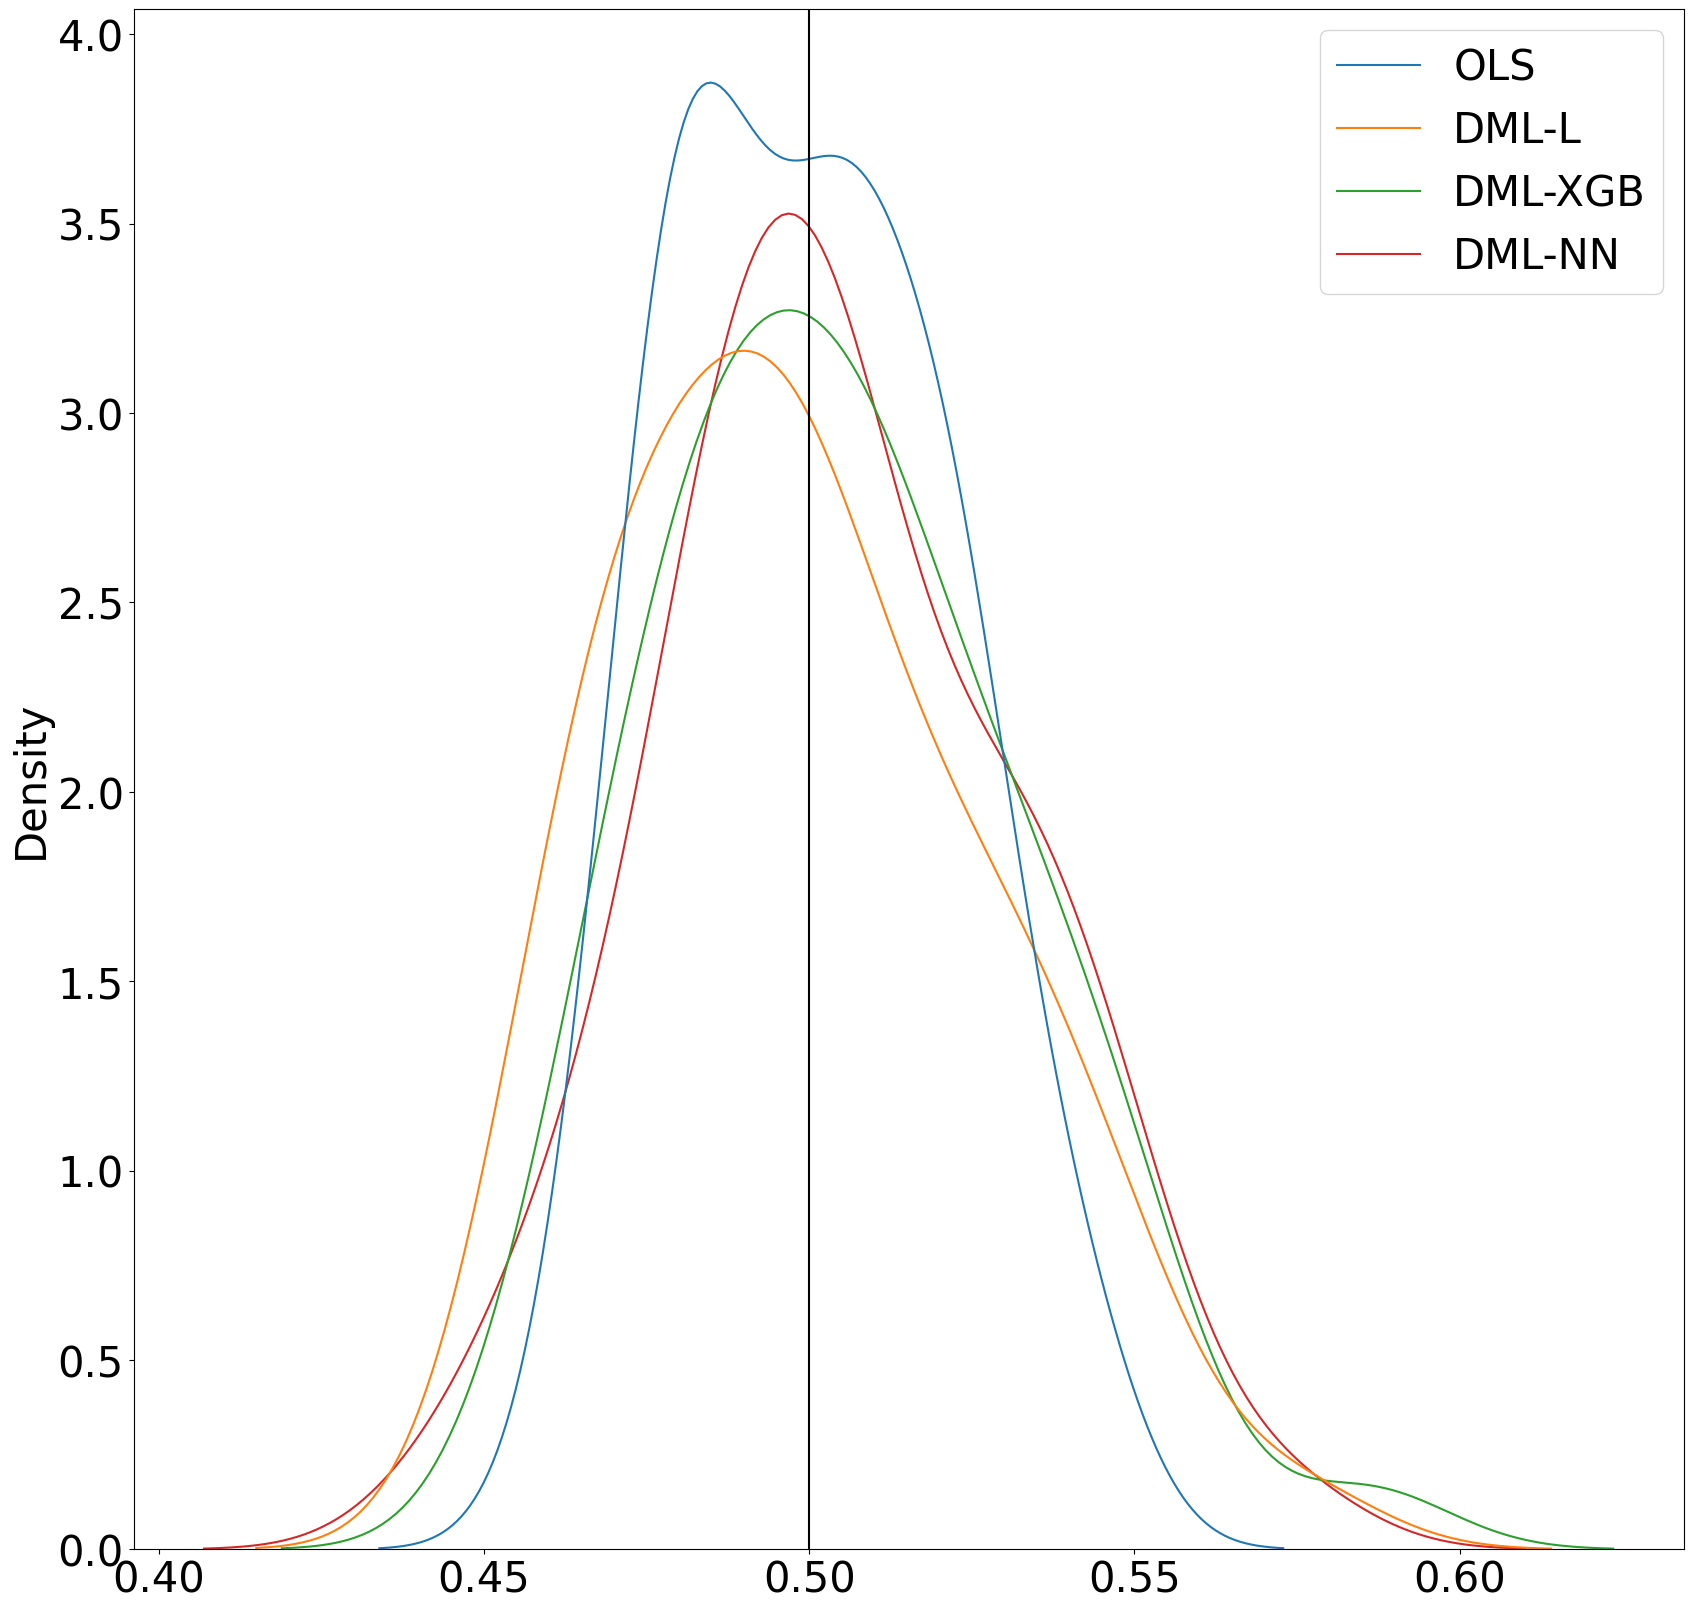

In [84]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt 
df = pd.DataFrame(MC_θ,columns=['OLS','DML-L','DML-XGB','DML-NN'])
plt.figure(figsize=(20,20))
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})
sns.kdeplot(df)
plt.axvline(0.5, color='black')
plt.savefig('ex1g.png')